In [1]:
import yfinance as yf
import matplotlib.pyplot as plt


##Muliple Linear Regression






In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
path='/content/drive/MyDrive/Colab Notebooks/SDSC3022/SDSC3022Ass1NVDA .csv'
df=pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/03/2019,37.897499,40.514999,37.422501,40.285000,40.011402,85972800
1,12/03/2019,40.564999,41.097500,39.797501,40.630001,40.354061,57957600
2,13/03/2019,41.007500,42.450001,40.932499,42.154999,41.868702,76890000
3,14/03/2019,42.247501,42.367500,41.312500,41.389999,41.108902,51938400
4,15/03/2019,41.825001,42.882500,41.790001,42.452499,42.164177,66148400
...,...,...,...,...,...,...,...
1254,04/03/2024,841.299988,876.950012,837.190002,852.369995,852.330017,61561600
1255,05/03/2024,852.700012,860.969971,834.169983,859.640015,859.640015,52063900
1256,06/03/2024,880.219971,897.239990,870.299988,887.000000,887.000000,58252000
1257,07/03/2024,901.580017,927.669983,896.020020,926.690002,926.690002,60811900


In [4]:
'''
import yfinance as yf
nvda= yf.download("NVDA")
nvda
hist = nvda.history(period="1mo")
print(hist)
'''

'\nimport yfinance as yf\nnvda= yf.download("NVDA")\nnvda\nhist = nvda.history(period="1mo")\nprint(hist)\n'

In [5]:
nvda_fin=pd.DataFrame()
nvda_fin

""


In [6]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Date'].dt.strftime('%y/%m/%d')
df['Date']

<ipython-input-6-22205b149e7c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'], errors='coerce')


0      2019-11-03
1      2019-12-03
2      2019-03-13
3      2019-03-14
4      2019-03-15
          ...    
1254   2024-04-03
1255   2024-05-03
1256   2024-06-03
1257   2024-07-03
1258   2024-08-03
Name: Date, Length: 1259, dtype: datetime64[ns]

In [7]:
NVDA=yf.Ticker("NVDA")


In [8]:
nvda_fin=NVDA.income_stmt
nvda_fin = nvda_fin.transpose()
nvda_fin


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2024-01-31,0.0,0.12,35583000000.0,0.0,0.0,29760000000.0,1508000000.0,16621000000.0,35583000000.0,34075000000.0,...,257000000.0,866000000.0,32972000000.0,11329000000.0,8675000000.0,2654000000.0,44301000000.0,16621000000.0,60922000000.0,60922000000.0
2023-01-31,-284130000.0,0.21,7340000000.0,-1353000000.0,-1353000000.0,4368000000.0,1544000000.0,11618000000.0,5987000000.0,4443000000.0,...,262000000.0,267000000.0,5577000000.0,9779000000.0,7339000000.0,2440000000.0,15356000000.0,11618000000.0,26974000000.0,26974000000.0
2022-01-31,0.0,0.019,11351000000.0,0.0,0.0,9752000000.0,1174000000.0,9439000000.0,11351000000.0,10177000000.0,...,236000000.0,29000000.0,10041000000.0,7434000000.0,5268000000.0,2166000000.0,17475000000.0,9439000000.0,26914000000.0,26914000000.0
2021-01-31,0.0,0.017,5691000000.0,0.0,0.0,4332000000.0,1098000000.0,6279000000.0,5691000000.0,4593000000.0,...,184000000.0,57000000.0,4532000000.0,5864000000.0,3924000000.0,1940000000.0,10396000000.0,6279000000.0,16675000000.0,16675000000.0


In [9]:
# Extract 'Close' column and convert to DataFrame
reliance = pd.DataFrame()
# Calculate 30-day Simple Moving Average (SMA)
reliance['Date']=df['Date'].copy()

reliance

,Date
0,2019-11-03
1,2019-12-03
2,2019-03-13
3,2019-03-14
4,2019-03-15
...,...
1254,2024-04-03
1255,2024-05-03
1256,2024-06-03
1257,2024-07-03


In [10]:
Return=df['Date'].to_frame()
Return['Daily']=df['Adj Close'].pct_change(1) # 1 for ONE DAY lookback
Return['Monthly return']=df['Adj Close'].pct_change(21)
Return['Annual Return']=df['Adj Close'].pct_change(252)
Return['SD 20 days'] = df['Adj Close'].rolling(window=20).std()
Return['SD 40 days'] = df['Adj Close'].rolling(window=40).std()
Return ['Month % rate']= df['Adj Close'].pct_change(periods=21)
Return ['Day % rate']= df['Adj Close'].pct_change(periods=1)
Return ['Volatility'] = Return ['Day % rate'].rolling(window=2).std()



Return

,Date,Daily,Monthly return,Annual Return,SD 20 days,SD 40 days,Month % rate,Day % rate,Volatility
0,2019-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-03,0.008564,NaN,NaN,NaN,NaN,NaN,0.008564,NaN
2,2019-03-13,0.037534,NaN,NaN,NaN,NaN,NaN,0.037534,0.020485
3,2019-03-14,-0.018147,NaN,NaN,NaN,NaN,NaN,-0.018147,0.039372
4,2019-03-15,0.025670,NaN,NaN,NaN,NaN,NaN,0.025670,0.030984
...,...,...,...,...,...,...,...,...,...
1254,2024-04-03,0.035951,0.352389,2.657666,50.692946,94.071245,0.352389,0.035951,0.002886
1255,2024-05-03,0.008576,0.299396,2.600091,55.265845,94.737949,0.299396,0.008576,0.019357
1256,2024-06-03,0.031827,0.279412,2.767663,60.217863,97.360510,0.279412,0.031827,0.016441
1257,2024-07-03,0.044746,0.358389,2.980536,68.521363,101.612650,0.358389,0.044746,0.009135


In [11]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with a column named 'close' containing the data

# Calculate the daily returns
df['returns'] = df['Adj Close'].pct_change()

# Calculate the volatility (standard deviation of returns)
volatility = df['returns'].std()

# Print the volatility
print(volatility)

0.032586990583619815


In [12]:
# Extract 'Close' column and convert to DataFrame
reliance=df['Date'].to_frame()
reliance['Adj Close'] = df['Adj Close']



# Calculate 30-day Simple Moving Average (SMA)
reliance['SMA7'] = df['Adj Close'].rolling(7).mean()
reliance['SMA14'] = df['Adj Close'].rolling(14).mean()
reliance['SMA30'] = df['Adj Close'].rolling(30).mean()
reliance['SMA90'] = df['Adj Close'].rolling(90).mean()
reliance['SMA365'] = df['Adj Close'].rolling(365).mean()


# Remove NULL values
reliance.dropna(inplace=True)

# Print DataFrame


In [13]:
window = 14
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window).mean()
average_loss = loss.rolling(window).mean()
rs = average_gain / average_loss
reliance['RSI'] = 100 - (100 / (1 + rs))

In [14]:
Return

,Date,Daily,Monthly return,Annual Return,SD 20 days,SD 40 days,Month % rate,Day % rate,Volatility
0,2019-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-03,0.008564,NaN,NaN,NaN,NaN,NaN,0.008564,NaN
2,2019-03-13,0.037534,NaN,NaN,NaN,NaN,NaN,0.037534,0.020485
3,2019-03-14,-0.018147,NaN,NaN,NaN,NaN,NaN,-0.018147,0.039372
4,2019-03-15,0.025670,NaN,NaN,NaN,NaN,NaN,0.025670,0.030984
...,...,...,...,...,...,...,...,...,...
1254,2024-04-03,0.035951,0.352389,2.657666,50.692946,94.071245,0.352389,0.035951,0.002886
1255,2024-05-03,0.008576,0.299396,2.600091,55.265845,94.737949,0.299396,0.008576,0.019357
1256,2024-06-03,0.031827,0.279412,2.767663,60.217863,97.360510,0.279412,0.031827,0.016441
1257,2024-07-03,0.044746,0.358389,2.980536,68.521363,101.612650,0.358389,0.044746,0.009135


In [15]:
reliance


,Date,Adj Close,SMA7,SMA14,SMA30,SMA90,SMA365,RSI
364,2020-08-18,122.253342,115.465509,112.779363,107.438845,91.581640,59.774557,80.753730
365,2020-08-19,121.034393,116.852208,113.865148,108.077827,92.179390,59.996538,76.352631
366,2020-08-20,121.059303,118.691168,114.952178,108.620256,92.738380,60.217648,76.366931
367,2020-08-21,126.468636,120.462110,116.143903,109.352884,93.366084,60.449429,77.509239
368,2020-08-24,126.835075,122.281481,117.206895,110.239649,93.959488,60.684295,76.088092
...,...,...,...,...,...,...,...,...
1254,2024-04-03,852.330017,801.249547,762.579939,702.909692,556.377267,355.523367,72.438940
1255,2024-05-03,859.640015,811.464835,772.465210,711.680625,561.078033,357.517828,73.411165
1256,2024-06-03,887.000000,825.195853,783.039115,721.290562,566.292103,359.584921,74.251162
1257,2024-07-03,926.690002,845.155413,797.335118,731.727189,572.108596,361.779918,80.099871


In [16]:
import pandas as pd

# Assuming you have two DataFrames called 'df1' and 'df2' with a column named 'Date'

# Merge the DataFrames based on the 'Date' column
merged_df = pd.merge(Return, reliance, on='Date')

# Print the merged DataFrame
merged_df_2=  pd.merge(df, merged_df, on='Date')
merged_df_2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close_x', 'Volume',
       'returns', 'Daily', 'Monthly return', 'Annual Return', 'SD 20 days',
       'SD 40 days', 'Month % rate', 'Day % rate', 'Volatility', 'Adj Close_y',
       'SMA7', 'SMA14', 'SMA30', 'SMA90', 'SMA365', 'RSI'],
      dtype='object')

<Axes: >

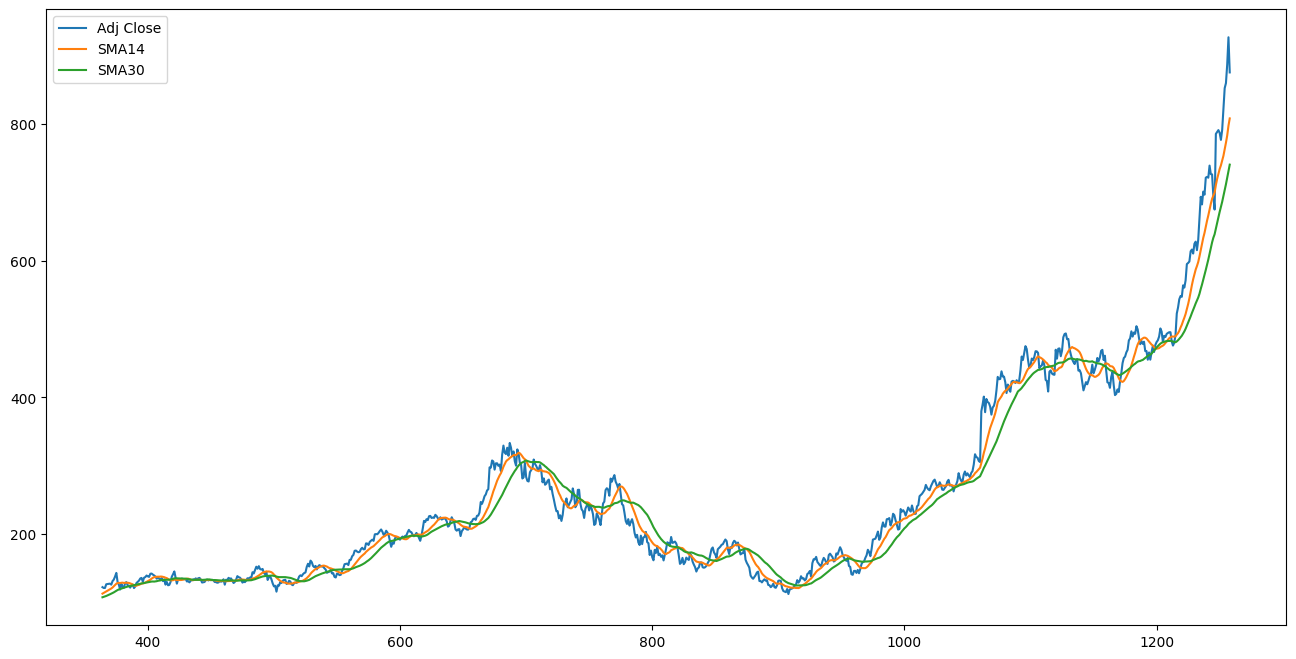

In [17]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
reliance[['Adj Close', 'SMA14','SMA30']].plot(label='RELIANCE',
								figsize=(16, 8))


In [18]:
merged_df_2.drop('Date', axis=1, inplace=True)
merged_df_2.drop('Open', axis=1, inplace=True)
merged_df_2.drop('High', axis=1, inplace=True)
merged_df_2.drop('Low', axis=1, inplace=True)
merged_df_2.drop('Close', axis=1, inplace=True)
#merged_df_2.drop('Volume', axis=1, inplace=True)
merged_df_2.drop('Daily', axis=1, inplace=True)
merged_df_2.drop('returns', axis=1, inplace=True)
merged_df_2.drop('Monthly return', axis=1, inplace=True)




In [19]:
merged_df_2.drop('Adj Close_y',axis=1)
merged_df_2.columns

Index(['Adj Close_x', 'Volume', 'Annual Return', 'SD 20 days', 'SD 40 days',
       'Month % rate', 'Day % rate', 'Volatility', 'Adj Close_y', 'SMA7',
       'SMA14', 'SMA30', 'SMA90', 'SMA365', 'RSI'],
      dtype='object')

In [20]:
y=merged_df_2['Adj Close_x']
X=merged_df_2.drop('Adj Close_y',axis=1)
X




,Adj Close_x,Volume,Annual Return,SD 20 days,SD 40 days,Month % rate,Day % rate,Volatility,SMA7,SMA14,SMA30,SMA90,SMA365,RSI
0,122.253342,50344800,1.879704,6.336745,7.856330,0.166496,-0.006181,0.051637,115.465509,112.779363,107.438845,91.581640,59.774557,80.753730
1,121.034393,62262400,1.900413,6.659009,8.120035,0.175243,-0.009971,0.002680,116.852208,113.865148,108.077827,92.179390,59.996538,76.352631
2,121.059303,92138800,1.844084,6.642245,8.239048,0.163070,0.000206,0.007196,118.691168,114.952178,108.620256,92.738380,60.217648,76.366931
3,126.468636,99986800,1.966837,6.987265,8.675774,0.252104,0.044683,0.031450,120.462110,116.143903,109.352884,93.366084,60.449429,77.509239
4,126.835075,49056400,2.141019,7.311496,8.903348,0.247756,0.002897,0.029547,122.281481,117.206895,110.239649,93.959488,60.684295,76.088092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,852.330017,61561600,2.657666,50.692946,94.071245,0.352389,0.035951,0.002886,801.249547,762.579939,702.909692,556.377267,355.523367,72.438940
891,859.640015,52063900,2.600091,55.265845,94.737949,0.299396,0.008576,0.019357,811.464835,772.465210,711.680625,561.078033,357.517828,73.411165
892,887.000000,58252000,2.767663,60.217863,97.360510,0.279412,0.031827,0.016441,825.195853,783.039115,721.290562,566.292103,359.584921,74.251162
893,926.690002,60811900,2.980536,68.521363,101.612650,0.358389,0.044746,0.009135,845.155413,797.335118,731.727189,572.108596,361.779918,80.099871


In [21]:
X_train=X.iloc[0:716,:].iloc[:,1:]
X_test=X.iloc[716:,:].iloc[:,1:]
y_train=y.iloc[0:716]
y_test=y.iloc[716:].copy()


In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [23]:
#X_train=X_train['SD 20 days']
#X_test=X_test
X_train.columns
#X_train
#y_train.shape

Index(['Volume', 'Annual Return', 'SD 20 days', 'SD 40 days', 'Month % rate',
       'Day % rate', 'Volatility', 'SMA7', 'SMA14', 'SMA30', 'SMA90', 'SMA365',
       'RSI'],
      dtype='object')

In [24]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

array([431.81775351, 423.87288199, 425.23699928, 416.07275743,
       411.97183502, 420.7143842 , 415.73145668, 415.82949145,
       417.57644994, 422.96761832, 424.20574561, 427.68837383,
       437.47026835, 446.98368795, 444.04361295, 454.61070627,
       462.03806175, 465.87347347, 462.5963172 , 460.08232462,
       463.87517221, 468.34809238, 464.68910188, 462.56828916,
       462.86179004, 461.97811962, 461.85187309, 452.04712999,
       457.73589002, 455.63626875, 457.53481478, 451.72768235,
       440.8730068 , 440.35807875, 428.24282203, 444.83221142,
       435.64769447, 429.67137322, 429.37429503, 432.99305323,
       457.20551868, 452.50350709, 464.55177772, 464.21248747,
       463.42535764, 473.71811314, 487.63705377, 487.15187794,
       492.80646556, 490.2330853 , 494.7974694 , 489.53648086,
       488.20428719, 482.32756326, 474.00336686, 468.18949471,
       463.86485242, 460.37000115, 450.07688324, 451.30588677,
       445.22502567, 436.00475484, 431.89290252, 434.05

In [25]:
for i in range(len(X_train.columns)):
  print("Coefficients:",X_train.columns[i], model.coef_[i])
print("Intercept:", model.intercept_)


Coefficients: Volume -2.3672445915233504e-08
Coefficients: Annual Return 5.710994098616105
Coefficients: SD 20 days 0.09040161997467122
Coefficients: SD 40 days -0.054432501918408205
Coefficients: Month % rate 31.022906799446773
Coefficients: Day % rate 107.30039112986077
Coefficients: Volatility 24.082458217189924
Coefficients: SMA7 1.0923966812370403
Coefficients: SMA14 -0.4987819485199486
Coefficients: SMA30 0.43180958508619116
Coefficients: SMA90 -0.06924310721128624
Coefficients: SMA365 0.10161640942545924
Coefficients: RSI 0.12687971650122173
Intercept: -18.007014129601316


In [26]:
X_train.columns

Index(['Volume', 'Annual Return', 'SD 20 days', 'SD 40 days', 'Month % rate',
       'Day % rate', 'Volatility', 'SMA7', 'SMA14', 'SMA30', 'SMA90', 'SMA365',
       'RSI'],
      dtype='object')

In [27]:
import pandas as pd

coefficients = []
intercepts = []

for i in range(len(X_train.columns)):
    coefficients.append((X_train.columns[i], model.coef_[i]))

intercepts.append(("Intercept", model.intercept_))

Coefficients_df = pd.DataFrame(coefficients + intercepts, columns=['Feature', 'Coefficient'])


In [28]:
Coefficients_df.to_csv('Coefficient.csv')

In [29]:
predictions

array([431.81775351, 423.87288199, 425.23699928, 416.07275743,
       411.97183502, 420.7143842 , 415.73145668, 415.82949145,
       417.57644994, 422.96761832, 424.20574561, 427.68837383,
       437.47026835, 446.98368795, 444.04361295, 454.61070627,
       462.03806175, 465.87347347, 462.5963172 , 460.08232462,
       463.87517221, 468.34809238, 464.68910188, 462.56828916,
       462.86179004, 461.97811962, 461.85187309, 452.04712999,
       457.73589002, 455.63626875, 457.53481478, 451.72768235,
       440.8730068 , 440.35807875, 428.24282203, 444.83221142,
       435.64769447, 429.67137322, 429.37429503, 432.99305323,
       457.20551868, 452.50350709, 464.55177772, 464.21248747,
       463.42535764, 473.71811314, 487.63705377, 487.15187794,
       492.80646556, 490.2330853 , 494.7974694 , 489.53648086,
       488.20428719, 482.32756326, 474.00336686, 468.18949471,
       463.86485242, 460.37000115, 450.07688324, 451.30588677,
       445.22502567, 436.00475484, 431.89290252, 434.05

In [30]:
y_test=y_test.reset_index()
y_test

,index,Adj Close_x
0,716,421.998322
1,717,406.231750
2,718,418.669067
3,719,411.080719
4,720,408.131348
...,...,...
174,890,852.330017
175,891,859.640015
176,892,887.000000
177,893,926.690002


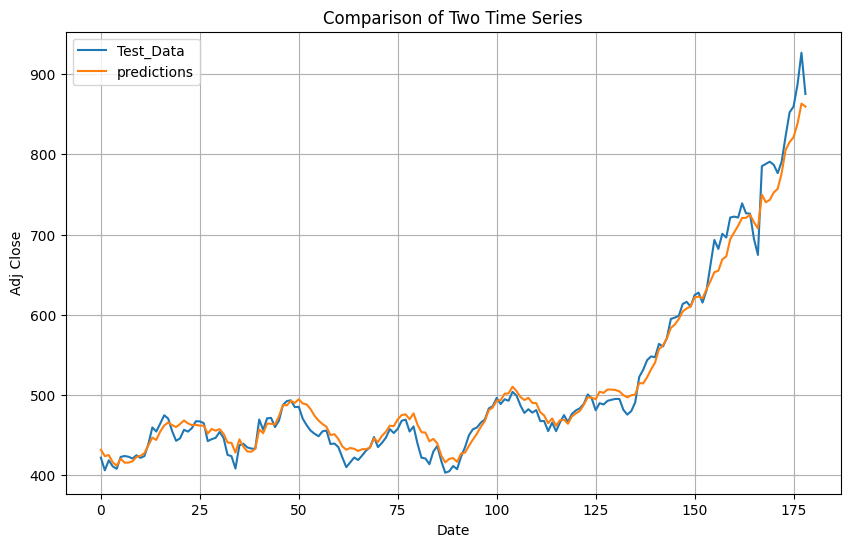

In [31]:
# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(y_test['Adj Close_x'], label='Test_Data')
plt.plot(predictions, label='predictions')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Comparison of Two Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
y_test_2=y_test['Adj Close_x']

In [34]:
y_train

0      122.253342
1      121.034393
2      121.059303
3      126.468636
4      126.835075
          ...    
711    426.437347
712    426.827301
713    437.984863
714    430.356506
715    430.156586
Name: Adj Close_x, Length: 716, dtype: float64

In [35]:
mae = mean_absolute_error(y_test_2, predictions)

# Calculate coefficient of determination (R^2 score)
r2 = r2_score(y_test_2, predictions)
mse = mean_squared_error(y_test_2, predictions)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2 score):", r2)

print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 248.70706566897428
Coefficient of Determination (R^2 score): 0.9812741960171778
Mean Absolute Error (MAE): 11.809653526431017


In [53]:





mae_2 = mean_absolute_error(y_test_2, predictions)

# Calculate coefficient of determination (R^2 score)
r2_2 = r2_score(y_test_2, predictions)
mse_2 = mean_squared_error(y_test_2, predictions)

print("Multiple Linear Regression")
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2 score):", r2)

print("Mean Absolute Error (MAE):", mae)

print("Lasso  Regression")

print("Mean Squared Error (MSE):", mse_2)
print("Coefficient of Determination (R^2 score):", r2_2)

print("Mean Absolute Error (MAE):", mae_2)

Multiple Linear Regression
Mean Squared Error (MSE): 295.53787352926656
Coefficient of Determination (R^2 score): 0.9777481822869678
Mean Absolute Error (MAE): 11.809653526431017
Lasso  Regression
Mean Squared Error (MSE): 248.70706566897428
Coefficient of Determination (R^2 score): 0.9812741960171778
Mean Absolute Error (MAE): 11.809653526431017


In [37]:
mae = mean_absolute_error(y_test_2, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_2, predictions)

print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 11.809653526431017


In [38]:
895*0.8

716.0

In [39]:
Date=reliance['Date'].iloc[716:]
Date=Date.reset_index()
Date=Date['Date']
Date

0     2023-06-23
1     2023-06-26
2     2023-06-27
3     2023-06-28
4     2023-06-29
         ...    
174   2024-04-03
175   2024-05-03
176   2024-06-03
177   2024-07-03
178   2024-08-03
Name: Date, Length: 179, dtype: datetime64[ns]

In [40]:


# Create DataFrame
df = pd.DataFrame({'Date': Date, 'actual data': y_test_2, 'pred': predictions})

# Convert 'Date' column to datetime type

# Set 'Date' column as the index

# Print the DataFrame
df

,Date,actual data,pred
0,2023-06-23,421.998322,431.817754
1,2023-06-26,406.231750,423.872882
2,2023-06-27,418.669067,425.236999
3,2023-06-28,411.080719,416.072757
4,2023-06-29,408.131348,411.971835
...,...,...,...
174,2024-04-03,852.330017,815.272060
175,2024-05-03,859.640015,821.377041
176,2024-06-03,887.000000,838.127993
177,2024-07-03,926.690002,863.204874


#Lasso


In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [42]:
y=merged_df_2['Adj Close_x']
X=merged_df_2.drop('Adj Close_x',axis=1)
X=merged_df_2.drop('Adj Close_y',axis=1)
X

,Adj Close_x,Volume,Annual Return,SD 20 days,SD 40 days,Month % rate,Day % rate,Volatility,SMA7,SMA14,SMA30,SMA90,SMA365,RSI
0,122.253342,50344800,1.879704,6.336745,7.856330,0.166496,-0.006181,0.051637,115.465509,112.779363,107.438845,91.581640,59.774557,80.753730
1,121.034393,62262400,1.900413,6.659009,8.120035,0.175243,-0.009971,0.002680,116.852208,113.865148,108.077827,92.179390,59.996538,76.352631
2,121.059303,92138800,1.844084,6.642245,8.239048,0.163070,0.000206,0.007196,118.691168,114.952178,108.620256,92.738380,60.217648,76.366931
3,126.468636,99986800,1.966837,6.987265,8.675774,0.252104,0.044683,0.031450,120.462110,116.143903,109.352884,93.366084,60.449429,77.509239
4,126.835075,49056400,2.141019,7.311496,8.903348,0.247756,0.002897,0.029547,122.281481,117.206895,110.239649,93.959488,60.684295,76.088092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,852.330017,61561600,2.657666,50.692946,94.071245,0.352389,0.035951,0.002886,801.249547,762.579939,702.909692,556.377267,355.523367,72.438940
891,859.640015,52063900,2.600091,55.265845,94.737949,0.299396,0.008576,0.019357,811.464835,772.465210,711.680625,561.078033,357.517828,73.411165
892,887.000000,58252000,2.767663,60.217863,97.360510,0.279412,0.031827,0.016441,825.195853,783.039115,721.290562,566.292103,359.584921,74.251162
893,926.690002,60811900,2.980536,68.521363,101.612650,0.358389,0.044746,0.009135,845.155413,797.335118,731.727189,572.108596,361.779918,80.099871


In [43]:
X_train=X.iloc[0:716,:].iloc[:,1:]
X_test=X.iloc[716:,:].iloc[:,1:]
y_train=y.iloc[0:716]
y_test=y.iloc[716:].copy()


In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

params = {'alpha': [0.1, 1, 10]}

grid = GridSearchCV(lasso, param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best alpha: ", grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+04, tolerance: 2.328e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+04, tolerance: 2.857e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+04, tolerance: 2.134e

Best alpha:  {'alpha': 10}


In [46]:


# Create lasso regressor
lasso = Lasso(alpha=1)

# Fit the regressor on training data
lasso.fit(X_train, y_train)

# Predict on test data
y_pred = lasso.predict(X_test)

y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.044e+04, tolerance: 3.035e+02
  model = cd_fast.enet_coordinate_descent(


array([429.54991431, 424.90230898, 426.15987915, 425.64092011,
       419.05704895, 420.35581621, 417.7928522 , 416.69812895,
       415.08775782, 418.1965264 , 419.46366187, 419.44814651,
       427.53463482, 436.0655498 , 442.7858187 , 452.86844344,
       460.19301207, 467.55005882, 468.94148772, 467.149274  ,
       463.16296784, 464.80341415, 463.39382531, 461.44384493,
       461.61299829, 462.43359166, 463.14486842, 456.63898759,
       455.3254177 , 452.84791743, 451.46572567, 448.42398347,
       443.32239933, 439.02503982, 432.28242075, 435.80432443,
       435.3901151 , 430.83621223, 427.21421561, 429.14677689,
       442.30119863, 450.61180477, 456.69595003, 462.62414362,
       462.73987283, 468.16920591, 480.37884042, 483.99928036,
       490.66863354, 488.36102762, 489.63942739, 489.22929351,
       486.71400821, 481.00868858, 469.15717319, 463.65671   ,
       457.86979973, 453.75075469, 449.1589036 , 444.26699936,
       434.62904612, 428.53492343, 423.64330612, 421.43

In [47]:
#y_test=y_test['Adj Close_x']
y_test
y_pred

array([429.54991431, 424.90230898, 426.15987915, 425.64092011,
       419.05704895, 420.35581621, 417.7928522 , 416.69812895,
       415.08775782, 418.1965264 , 419.46366187, 419.44814651,
       427.53463482, 436.0655498 , 442.7858187 , 452.86844344,
       460.19301207, 467.55005882, 468.94148772, 467.149274  ,
       463.16296784, 464.80341415, 463.39382531, 461.44384493,
       461.61299829, 462.43359166, 463.14486842, 456.63898759,
       455.3254177 , 452.84791743, 451.46572567, 448.42398347,
       443.32239933, 439.02503982, 432.28242075, 435.80432443,
       435.3901151 , 430.83621223, 427.21421561, 429.14677689,
       442.30119863, 450.61180477, 456.69595003, 462.62414362,
       462.73987283, 468.16920591, 480.37884042, 483.99928036,
       490.66863354, 488.36102762, 489.63942739, 489.22929351,
       486.71400821, 481.00868858, 469.15717319, 463.65671   ,
       457.86979973, 453.75075469, 449.1589036 , 444.26699936,
       434.62904612, 428.53492343, 423.64330612, 421.43

In [48]:
r2 = r2_score(y_test, y_pred)
r2

0.9777481822869678

In [49]:
mse = mean_squared_error(y_test, y_pred)
mse

295.53787352926656

In [50]:
y_test=y_test.reset_index()
y_test=y_test['Adj Close_x']
y_test

0      421.998322
1      406.231750
2      418.669067
3      411.080719
4      408.131348
          ...    
174    852.330017
175    859.640015
176    887.000000
177    926.690002
178    875.280029
Name: Adj Close_x, Length: 179, dtype: float64

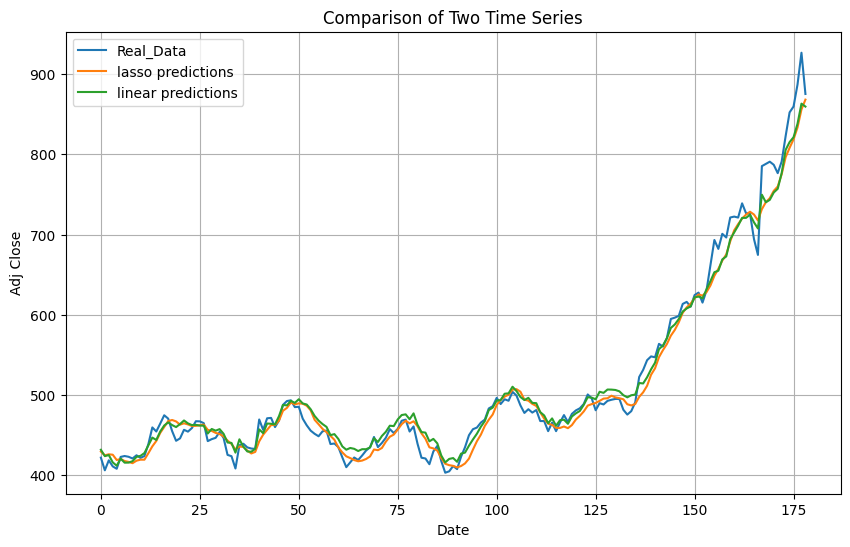

In [51]:
# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real_Data')
plt.plot(y_pred, label='lasso predictions')
plt.plot(predictions, label='linear predictions')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Comparison of Two Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [52]:


# Create DataFrame
df = pd.DataFrame({'Date': Date, 'actual data': y_test, 'pred': y_pred})

# Convert 'Date' column to datetime type

# Set 'Date' column as the index

# Print the DataFrame
df

,Date,actual data,pred
0,2023-06-23,421.998322,429.549914
1,2023-06-26,406.231750,424.902309
2,2023-06-27,418.669067,426.159879
3,2023-06-28,411.080719,425.640920
4,2023-06-29,408.131348,419.057049
...,...,...,...
174,2024-04-03,852.330017,808.163955
175,2024-05-03,859.640015,818.752076
176,2024-06-03,887.000000,833.465037
177,2024-07-03,926.690002,855.958707
